In [1]:
from os import fsdecode
import subprocess
import math
import json
from numpy import linalg as la, ma
import numpy as np
import time
import os
import julian
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import linalg
from scipy.spatial.transform import Rotation as R
from scipy.spatial import distance
from scipy.stats import burr
from datetime import datetime as dt
import uuid
import sys
from pprint import pprint
import shutil
import astropy
import numpy as np
import sys
from astropy.utils import iers
from astropy.time import Time

In [2]:
#Define the function that generates/modifies the neptune.inp file and then executes neptune
def propagate(
    inputTypeStateVector = 2,
    inputTypeCovarianceMatrix = '  2',
    beginDate = '2016 07 20 00 31 50.00',
    endDate = '2016 07 27 00 31 50.00',
    radiusX = 615.119526,
    radiusY = -7095.644839,
    radiusZ = -678.668352,
    velocityX = 0.390367,
    velocityY = 0.741902,
    velocityZ = -7.396980,
    semiMajorAxis = 6800.59176,
    eccentricity = 0.0012347,
    inclination = 98.4076293,
    rightAscensionOfAscendingNode = 30.3309997,
    argumentOfPerigee = 68.5606724,
    trueAnomaly = 91.5725696,
    variancePositionX = 10.,
    variancePositionY = 100.,
    variancePositionZ = 30.,
    varianceVelocityX = 2.,
    varianceVelocityY = 1.,
    varianceVelocityZ = 1.,
    covMatrix2row = '0.d0',
    covMatrix3row = '0.d0 0.d0',
    covMatrix4row = '0.d0 0.d0 0.d0',
    covMatrix5row = '0.d0 0.d0 0.d0 0.d0',
    covMatrix6row = '0.d0 0.d0 0.d0 0.d0 0.d0',
    geopotential = 6,
    atmosphericDrag = 1,
    sunGravity = 1,
    moonGravity = 1,
    solarRadiationPressure = 1,
    earthAlbedo = 1,
    solidEarthTides = 1,
    oceanTides = 0,
    orbitalManeuvers = 0,
    geopotentialModel = 3,
    atmosphericModel = 2,
    geopotentialHarmonicSwitch = 0,
    geopotentialHarmonic = '20 30',
    shadowModelSwitch = 1,
    shadowBoundaryCorrection = 0,
    covariancePropagationSwitch = 1,
    covariancePropagationDegGeopotential = 36,
    covariancePropagationAtmosDrag = 1,
    covariancePropagationSun = 0,
    covariancePropagationMoon = 0,
    covariancePropagationSolarRadPressure = 0,
    noiseMatrixComputation = 0,
    fapDayFile = 'fap_day.dat'):
    
    runId = str(uuid.uuid4())

    with open("input/neptune.inp", 'r', encoding="utf-8") as f:
        lines = f.readlines()

    lines[23] = str(runId) + '\n'
    lines[44] = str(inputTypeStateVector) + '\n'
    lines[51] = str(inputTypeCovarianceMatrix) + '\n'
    lines[59] = str(beginDate) + '\n'
    lines[60] = str(endDate)  + '\n'
    lines[66] = str(radiusX) + 'd0 \n'
    lines[67] = str(radiusY) + 'd0 \n'
    lines[68] = str(radiusZ) + 'd0 \n'
    lines[69] = str(velocityX) + 'd0 \n'
    lines[70] = str(velocityY) + 'd0 \n'
    lines[71] = str(velocityZ) + 'd0 \n'
    lines[75] = str(semiMajorAxis) + '\n'
    lines[76] = str(eccentricity) + '\n'
    lines[77] = str(inclination) + '\n'
    lines[78] = str(rightAscensionOfAscendingNode) + '\n'
    lines[79] = str(argumentOfPerigee) + '\n'
    lines[80] = str(trueAnomaly) + '\n'
    lines[84] = str(variancePositionX) + 'd0 \n'
    lines[85] = str(variancePositionY) + 'd0 \n'
    lines[86] = str(variancePositionZ) + 'd0 \n'
    lines[87] = str(varianceVelocityX) + 'd-4 \n'
    lines[88] = str(varianceVelocityY) + 'd-4 \n'
    lines[89] = str(varianceVelocityZ) + 'd-4 \n'
    lines[91] = str(covMatrix2row) + '\n'
    lines[92] = str(covMatrix3row) + '\n'
    lines[93] = str(covMatrix4row) + '\n'
    lines[94] = str(covMatrix5row) + '\n'
    lines[95] = str(covMatrix6row) + '\n'
    lines[105] = str(geopotential) + '\n'
    lines[106] = str(atmosphericDrag) + '\n'
    lines[107] = str(sunGravity) + '\n'
    lines[108] = str(moonGravity) + '\n'
    lines[109] = str(solarRadiationPressure) + '\n'
    lines[110] = str(earthAlbedo) + '\n'
    lines[111] = str(solidEarthTides) + '\n'
    lines[112] = str(oceanTides) + '\n'
    lines[113] = str(orbitalManeuvers) + '\n'
    lines[120] = str(geopotentialModel) + '\n'
    lines[127] = str(atmosphericModel) + '\n'
    lines[135] = str(geopotentialHarmonicSwitch) + '\n'
    lines[136] = str(geopotentialHarmonic) + '\n'
    lines[140] = str(shadowModelSwitch) + '\n'
    lines[141] = str(shadowBoundaryCorrection) + '\n'
    lines[145] = str(covariancePropagationSwitch) + '\n'
    lines[146] = str(covariancePropagationDegGeopotential) + '\n'
    lines[147] = str(covariancePropagationAtmosDrag) + '\n'
    lines[148] = str(covariancePropagationSun) + '\n'
    lines[149] = str(covariancePropagationMoon) + '\n'
    lines[150] = str(covariancePropagationSolarRadPressure) + '\n'
    lines[157] = str(noiseMatrixComputation) + '\n'
    lines[246] = str(fapDayFile) + '\n'

    with open("input/neptune.inp", 'w', encoding="utf-8") as file:
        file.writelines(lines)

    input_dict = {
        'runId': runId,
        'inputTypeStateVector': inputTypeStateVector,
        'inputTypeCovarianceMatrix': inputTypeCovarianceMatrix,
        'beginDate': beginDate,
        'endDate': endDate,
        'radiusX': radiusX, 
        'radiusY': radiusY, 
        'radiusZ': radiusZ, 
        'velocityX': velocityX, 
        'velocityY': velocityY, 
        'velocityZ': velocityZ, 
        'semiMajorAxis': semiMajorAxis,
        'eccentricity': eccentricity,
        'inclination': inclination,
        'rightAscensionOfAscendingNode': rightAscensionOfAscendingNode,
        'argumentOfPerigee': argumentOfPerigee,
        'trueAnomaly': trueAnomaly,
        'variancePositionX': variancePositionX, 
        'variancePositionY': variancePositionY, 
        'variancePositionZ': variancePositionZ, 
        'varianceVelocityX': varianceVelocityX, 
        'varianceVelocityY': varianceVelocityY, 
        'varianceVelocityZ': varianceVelocityZ, 
        'covMatrix2row': covMatrix2row,
        'covMatrix3row': covMatrix3row,
        'covMatrix4row': covMatrix4row,
        'covMatrix5row': covMatrix5row,
        'covMatrix6row': covMatrix6row,
        'geopotential': geopotential,
        'atmosphericDrag': atmosphericDrag,
        'sunGravity': sunGravity,
        'moonGravity': moonGravity,
        'solarRadiationPressure': solarRadiationPressure,
        'earthAlbedo': earthAlbedo,
        'solidEarthTides': solidEarthTides,
        'oceanTides': oceanTides,
        'orbitalManeuvers': orbitalManeuvers,
        'geopotentialModel': geopotentialModel,
        'atmosphericModel': atmosphericModel,
        'geopotentialHarmonicSwitch': geopotentialHarmonicSwitch,
        'geopotentialHarmonic': geopotentialHarmonic,
        'shadowModelSwitch': shadowModelSwitch,
        'shadowBoundaryCorrection': shadowBoundaryCorrection,
        'covariancePropagationSwitch': covariancePropagationSwitch,
        'covariancePropagationDegGeopotential': covariancePropagationDegGeopotential,
        'covariancePropagationAtmosDrag': covariancePropagationAtmosDrag,
        'covariancePropagationSun' : covariancePropagationSun,
        'covariancePropagationMoon': covariancePropagationMoon,
        'covariancePropagationSolarRadPressure': covariancePropagationSolarRadPressure,
        'noiseMatrixComputation': noiseMatrixComputation,
        'fapDayFile': fapDayFile
    }

    subprocess.call("../bin/neptune-sa", stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

    output_dir = os.path.join("output",str(input_dict['runId']))
    os.mkdir(output_dir)

    for filetype in ['.acc', '.csv', '.cvu', '.osc', '.vru']:
        filename = str(input_dict['runId']) + str(filetype)
        src = os.path.join("output", filename)
        dst = os.path.join("output",str(input_dict['runId']))
        shutil.move(src,dst)

    filename = str(input_dict['runId']) + '.json'
    filepath = os.path.join("output",str(input_dict['runId']), filename)

    with open(filepath, 'w') as f:
        json.dump(input_dict, f)
    
    return runId


In [3]:
# Override runID
# a81d2b74-9cfb-4590-a5b8-84088184112e              geopotential = 36
# 9783a265-62c7-4f40-9c40-0bd5463a24a2              geopotential = 6
def plot_rundId(runId):
    filename = str(runId) + '.json'
    input_json_path = os.path.join("output", str(runId), filename)

    with open(input_json_path) as json_file:
        input_json = json.load(json_file)


    print('Geopotential: ' + str(input_json['geopotential']))
    ######################################################
    # Plot the covariances 
    ######################################################

    filename = str(runId) + ".vru"
    output_file_path = os.path.join("output", str(runId),  filename)

    # read file to pandas data frame
    data = pd.read_table(
                output_file_path, 
                comment='#', 
                header=None, 
                sep='\s+', 
                names=['date','time','mjd','rx','ry','rz','vx','vy','vz'], parse_dates=[[0,1]]
        )

    data_labels = ['rx','ry','rz','vx','vy','vz']

    data[data_labels] = data[data_labels].apply(np.sqrt)
    data[data_labels] = data[data_labels].multiply(1000.0)

    # strip MJD
    data = data[['date_time', 'rx', 'ry', 'rz', 'vx', 'vy', 'vz']]

    ######################################################
    # Plot the kepler elements
    ######################################################

    filename = str(runId) + ".osc"
    output_file_path = os.path.join("output", str(runId), filename)

    # now plot
    data.plot(x='date_time', subplots=True, sharex=True, title='$1\sigma$ errors (r in m, v in m/s)')
    plt.show()
    data = pd.read_table(
                output_file_path, 
                comment='#', 
                header=None, 
                sep='\s+', 
                names=['date','time','mjd','sma','ecc','inc','raan','aop','tran','mean'], parse_dates=[[0,1]]
        )

    # strip MJD
    sma = data[['date_time', 'sma']]
    # now plot
    sma.plot(  
        x='date_time',
        subplots=True, 
        sharex=True, 
        title='SMA (km, deg)',
        color='c'
    )
    # set the 
    #plt.xlim([dt(2016, 7, 21), dt(2016, 7, 23)])
    plt.show()

    # strip MJD
    ecc = data[['date_time', 'ecc']]
    # now plot
    ecc.plot(  
        x='date_time',
        subplots=True, 
        sharex=True, 
        title='ecc (km, deg)',
        color='r'
    )
    # set the 
    #plt.xlim([dt(2016, 7, 21), dt(2016, 7, 23)])
    plt.show()

    # strip MJD
    inc = data[['date_time', 'inc']]
    # now plot
    inc.plot(  
        x='date_time',
        subplots=True, 
        sharex=True, 
        title='inc (km, deg)',
        color='b'
    )
    # set the 
    #plt.xlim([dt(2016, 7, 21), dt(2016, 7, 23)])
    plt.show()

    # strip MJD
    raan = data[['date_time', 'raan']]
    # now plot
    raan.plot(  
        x='date_time',
        subplots=True, 
        sharex=True, 
        title='Raan (km, deg)',
        color='y'
    )
    # set the 
    #plt.xlim([dt(2016, 7, 21), dt(2016, 7, 23)])
    plt.show()

    # strip MJD
    data = data[['date_time', 'aop']]
    data['aop'] = data['aop'].apply(lambda x: math.radians(x))
    data['aop'] = np.unwrap(data['aop'].tolist())
    # now plot
    data.plot(  
        x='date_time',
        subplots=True, 
        sharex=True, 
        title='aop (km, deg)',
        color = 'k'
    )
    # set the 
    #plt.xlim([dt(2016, 7, 21), dt(2016, 7, 23)])
    plt.show()


In [4]:
def fap_day_modifier(f10Mod = 0, f3mMod = 0, ssnMod = 0, apMod = 0):
    with open("data/fap_day.dat", 'r') as f:
        lines = f.readlines()

    for i in range(2, len(lines)):
        splitLine = lines[i].split()

        f10 = int(splitLine[1]) + int(f10Mod)
        splitLine[1] = str(f10).zfill(3)

        f3m = int(splitLine[2]) + int(f3mMod)
        splitLine[2] = str(f3m).zfill(3)

        ssn = int(splitLine[3]) + int(ssnMod)
        splitLine[3] = str(ssn).zfill(3)

        ap = int(splitLine[4]) + int(apMod)
        splitLine[4] = str(ap).zfill(3)

        splitLine.append('\n')
        lines[i] = ' '.join(splitLine)

    with open("data/fap_day_modified.dat", 'w') as file:
        file.writelines(lines)

fap_day_modifier()
    

In [5]:
def get_rtn_matrix(state_vector):
  r = state_vector[0:3]
  v = state_vector[3:6]
  rxv = np.cross(r, v)
  vecRTN = np.empty([3,3],float)
  # process vector R
  vecRTN[0,:] = np.divide(r,np.linalg.norm(r))

  # process vector W
  vecRTN[2,:] = np.divide(rxv,np.linalg.norm(rxv))

  # process vector S
  vecRTN[1,:] = np.cross(vecRTN[2,:], vecRTN[0,:])

  return vecRTN

In [6]:
# Run propagation with burr distribution on f10.7 values
numberIterations = 100
# Generate f10.7 modifier list using normal distribution
f10ModList = np.random.normal(0.0, 20, numberIterations)
apModList = np.random.normal(0.0, 7, numberIterations)

# Initialise the runIdList IF no additional 
runIdList = []

#Set variables
noiseMatrixComputation = 0
covariancePropagationSwitch = 0
beginDate = '2016 07 20 00 31 50.00',
endDate = '2016 07 27 00 31 50.00',

# Create a initial "unmodified" reference propagation
runIdList.append(propagate(beginDate = beginDate, endDate = endDate,noiseMatrixComputation=noiseMatrixComputation, covariancePropagationSwitch=covariancePropagationSwitch))

for i in range(0, len(f10ModList)):
    fap_day_modifier(f10Mod=f10ModList[i])

    runIdList.append(propagate(beginDate = beginDate, endDate = endDate,noiseMatrixComputation=noiseMatrixComputation, covariancePropagationSwitch=covariancePropagationSwitch, fapDayFile='fap_day_modified.dat',))


PermissionError: [Errno 13] Permission denied: '../bin/neptune-sa'

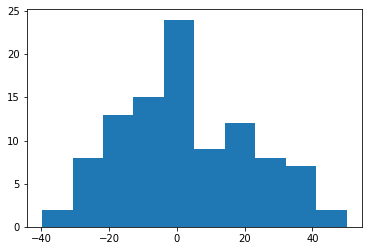

In [14]:

plt.hist(f10ModList)
plt.show()

Number of Propagations: 101


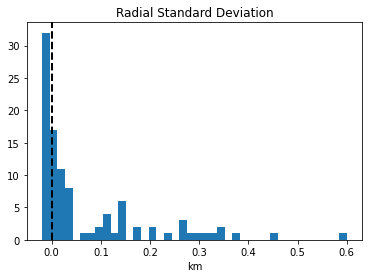

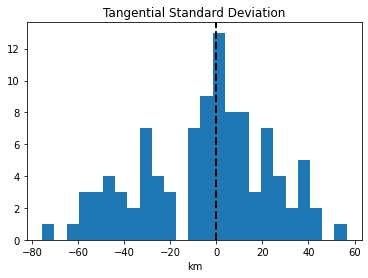

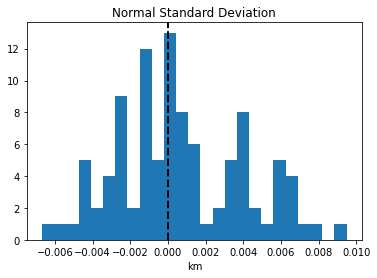

In [12]:
# x = []
# y = []
# z = []
# u = []
# v = []
# w = []
r = []
t = []
n = []

# Calculate required data from the reference propagation
filename = str(runIdList[0]) + ".csv"
output_file_path = os.path.join("output", str(runIdList[0]), filename)

data = pd.read_table(
            output_file_path, 
            comment='#', 
            header=None, 
            sep='\s+', 
            names=['date','time','mjd','x','y','z','u','v','w'], parse_dates=[[0,1]]
    )

stateVector = [
    data.tail(1)['x'].values[0],
    data.tail(1)['y'].values[0],
    data.tail(1)['z'].values[0],
    data.tail(1)['u'].values[0],
    data.tail(1)['v'].values[0],
    data.tail(1)['w'].values[0]]

rtnMatrix = get_rtn_matrix(state_vector=stateVector)
rtnMatrix = np.array(rtnMatrix)
stateVector = np.array([
    data.tail(1)['x'].values[0],
    data.tail(1)['y'].values[0],
    data.tail(1)['z'].values[0]
])
RTN1 = np.dot(rtnMatrix, stateVector)

# filename = str(runIdList[0]) + ".vru"
# output_file_path = os.path.join("output", str(runIdList[0]),  filename)

# # read file to pandas data frame
# data = pd.read_table(
#             output_file_path, 
#             comment='#', 
#             header=None, 
#             sep='\s+', 
#             names=['date','time','mjd','rx','ry','rz','vx','vy','vz'], parse_dates=[[0,1]]
#     )

# data_labels = ['rx','ry','rz','vx','vy','vz']

# data[data_labels] = data[data_labels].apply(np.sqrt)
# #data[data_labels] = data[data_labels].multiply(1000.0)

# # strip MJD
# data = data[['date_time', 'rx', 'ry', 'rz', 'vx', 'vy', 'vz']]

# covarianceVector = np.array([data.tail(1)['rx'].values[0], data.tail(1)['ry'].values[0], data.tail(1)['ry'].values[0]])
# covarianceVectorRTN = np.dot(rtnMatrix, covarianceVector)

print("Number of Propagations: " + str(len(runIdList)))
for i in range(1, len(runIdList)):
    filename = str(runIdList[i]) + ".csv"
    output_file_path = os.path.join("output", str(runIdList[i]), filename)

    data = pd.read_table(
                output_file_path, 
                comment='#', 
                header=None, 
                sep='\s+', 
                names=['date','time','mjd','x','y','z','u','v','w'], parse_dates=[[0,1]]
        )
    
    stateVector = np.array([
    data.tail(1)['x'].values[0],
    data.tail(1)['y'].values[0],
    data.tail(1)['z'].values[0]
    ])
    RTN2 = np.dot(rtnMatrix, stateVector)

    r.append(RTN1[0]-RTN2[0])
    t.append(RTN1[1]-RTN2[1])
    n.append(RTN1[2]-RTN2[2])


plt.hist(r, bins=40)
plt.xlabel("km")
plt.title("Radial Standard Deviation")
plt.axvline(0, color='k', linestyle='dashed', linewidth=2)
#plt.axvline(covarianceVectorRTN[0], color='r', linestyle='dashed', linewidth=1)
#plt.axvline(-covarianceVectorRTN[0], color='r', linestyle='dashed', linewidth=1)
plt.show()

plt.hist(t, bins=25)
plt.xlabel("km")
plt.title("Tangential Standard Deviation")
plt.axvline(0, color='k', linestyle='dashed', linewidth=2)
# plt.axvline(covarianceVectorRTN[1], color='r', linestyle='dashed', linewidth=1)
# plt.axvline(-covarianceVectorRTN[1], color='r', linestyle='dashed', linewidth=1)
plt.show()

plt.hist(n, bins=25)
plt.xlabel("km")
plt.title("Normal Standard Deviation")
plt.axvline(0, color='k', linestyle='dashed', linewidth=2)
#plt.axvline(-covarianceVectorRTN[2], color='r', linestyle='dashed', linewidth=1)
plt.show()




Geopotential: 6


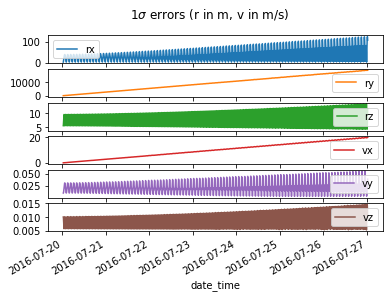

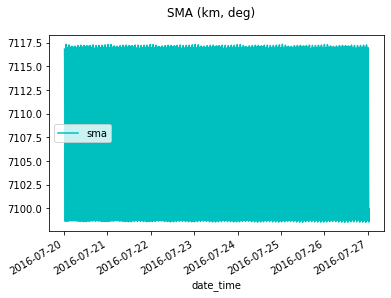

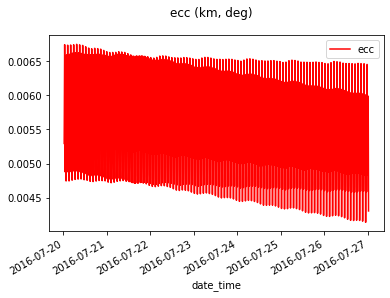

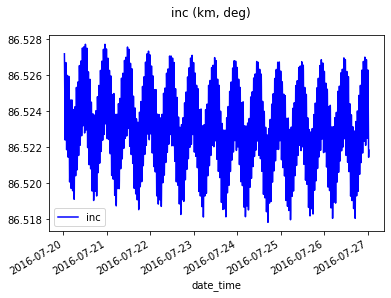

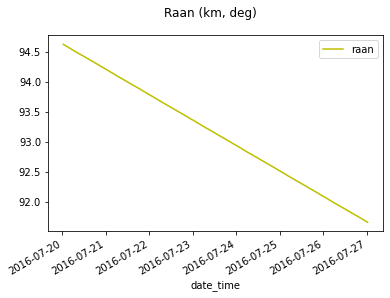

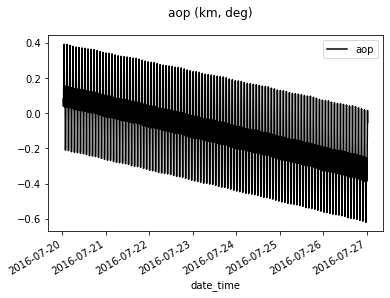

Geopotential: 36


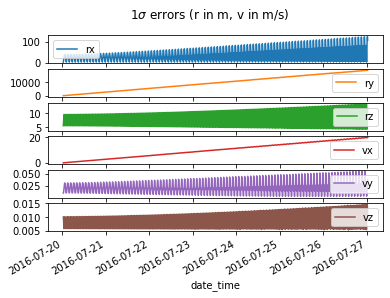

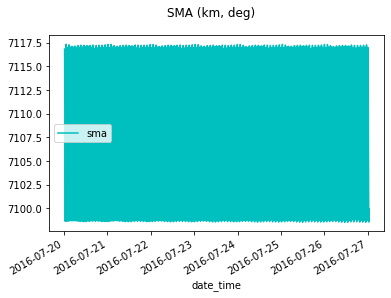

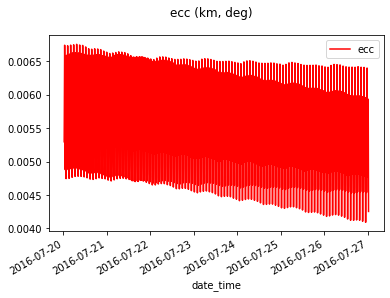

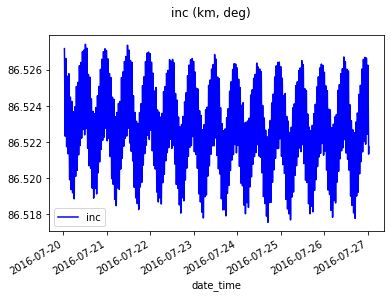

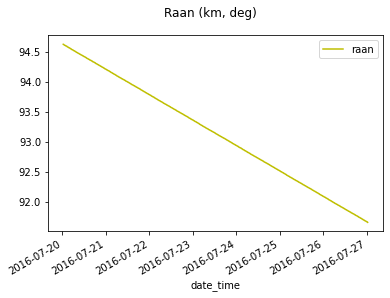

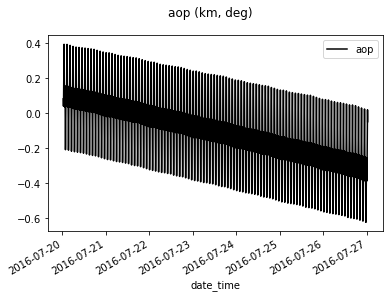

In [120]:
# Override runID
# a81d2b74-9cfb-4590-a5b8-84088184112e              geopotential = 36
# 9783a265-62c7-4f40-9c40-0bd5463a24a2              geopotential = 6

for id in ['9783a265-62c7-4f40-9c40-0bd5463a24a2','a81d2b74-9cfb-4590-a5b8-84088184112e']:
    plot_rundId(id)

In [203]:
filename = "fap_day.dat"
output_file_path = os.path.join("data",  filename)

# read file to pandas data frame
data = pd.read_table(
            output_file_path, 
            comment='#', 
            header=None, 
            sep='\s+', 
            names=['date', 'F10', 'F3M', 'SSN', 'Ap'], parse_dates=[1]
    )


print(data)
# now plot
data.plot(x='date', subplots=True, sharex=True, title='Space Weather')
plt.show()
# set the 
#plt.xlim([dt(2016, 7, 21), dt(2016, 7, 23)])

TypeError: 'NoneType' object is not subscriptable

In [204]:
print(len(runIdList))

52
